In [16]:
import pandas as pd
import numpy as np

df = pd.read_csv('train.csv', low_memory=False, parse_dates=['Date'])
df.head(5)

Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   
2      3          5 2015-07-31   8314        821     1      1            0   
3      4          5 2015-07-31  13995       1498     1      1            0   
4      5          5 2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [9]:
dfg = df.groupby('Store')
dfg

In [10]:
store_avg = dfg.mean()
store_avg.head()

DayOfWeek        Sales    Customers      Open     Promo  SchoolHoliday
Store                                                                        
1       3.997877  3945.704883   467.646497  0.829087  0.382166       0.204883
2       3.997877  4122.991507   486.045648  0.832272  0.382166       0.177282
3       3.997877  5741.253715   620.286624  0.826964  0.382166       0.180467
4       3.997877  8021.769639  1100.057325  0.832272  0.382166       0.183652
5       3.997877  3867.110403   444.360934  0.826964  0.382166       0.182590

In [11]:
store_avg = store_avg.reset_index()
store_avg.head()

Store  DayOfWeek        Sales    Customers      Open     Promo  \
0      1   3.997877  3945.704883   467.646497  0.829087  0.382166   
1      2   3.997877  4122.991507   486.045648  0.832272  0.382166   
2      3   3.997877  5741.253715   620.286624  0.826964  0.382166   
3      4   3.997877  8021.769639  1100.057325  0.832272  0.382166   
4      5   3.997877  3867.110403   444.360934  0.826964  0.382166   

   SchoolHoliday  
0       0.204883  
1       0.177282  
2       0.180467  
3       0.183652  
4       0.182590

In [12]:
store_avg = store_avg.drop(columns=['level_0','index'])
store_avg.head()

KeyError: "['level_0' 'index'] not found in axis"

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


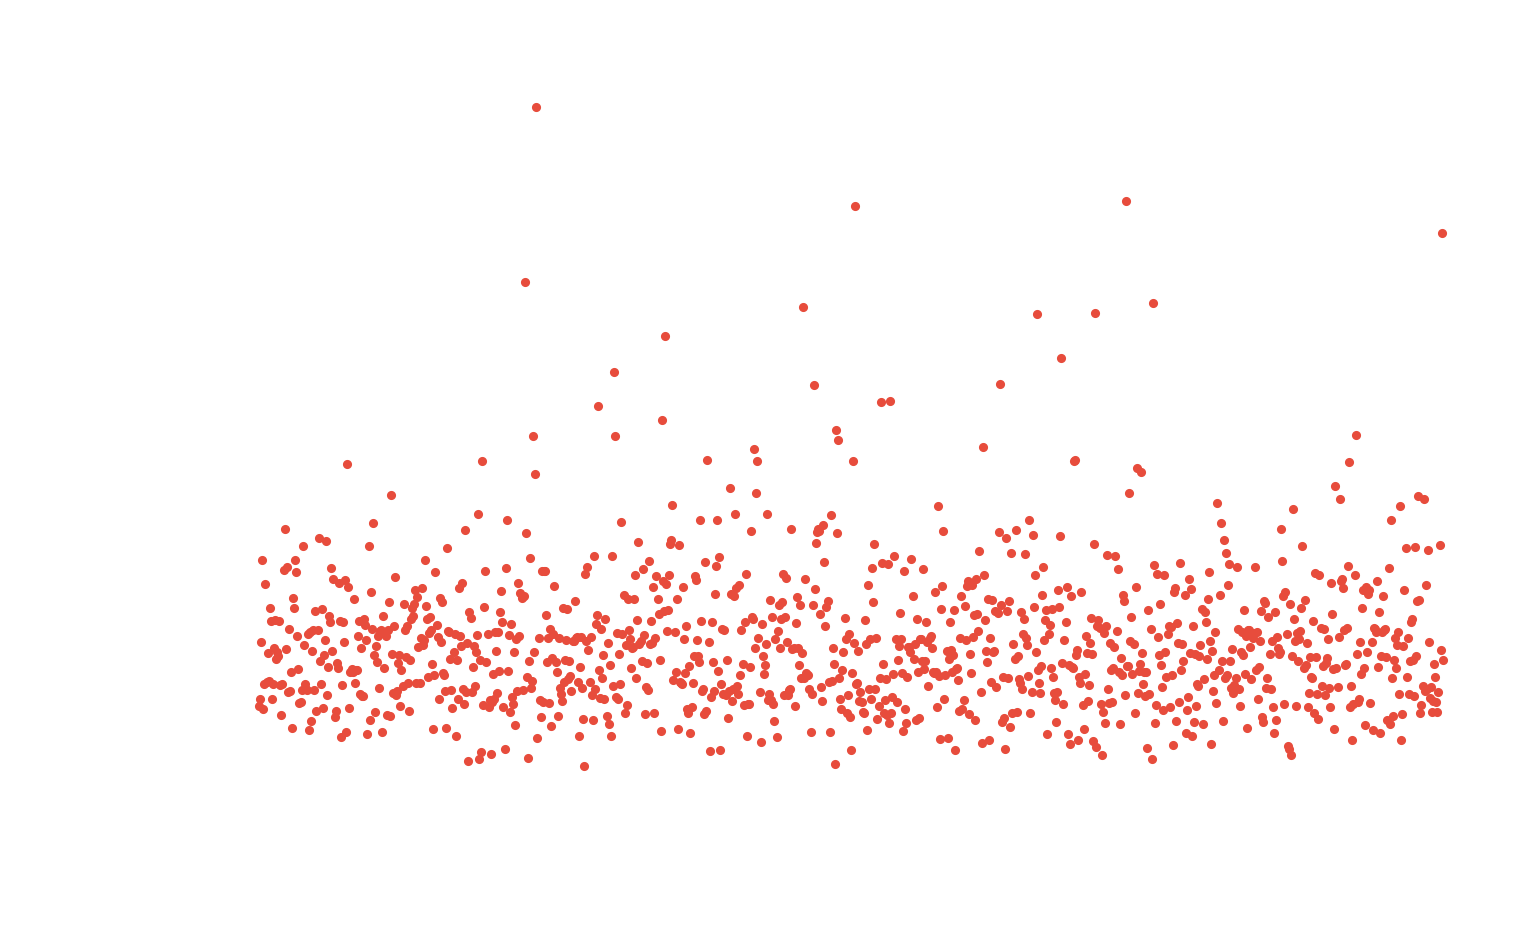

In [13]:
store_avg.plot.scatter('Store', 'Sales', s=3, title='Avg sale per store')

In [21]:
store_day = df.groupby(['Store', 'DayOfWeek'], as_index=False).mean()
store_day.head()

Store  DayOfWeek        Sales   Customers      Open     Promo  \
0      1          1  4946.119403  567.768657  0.955224  0.537313   
1      1          2  4650.918519  545.370370  0.992593  0.533333   
2      1          3  4454.474074  530.407407  0.977778  0.533333   
3      1          4  4094.607407  493.407407  0.918519  0.533333   
4      1          5  4516.414815  537.259259  0.955556  0.533333   

   SchoolHoliday  
0       0.223881  
1       0.229630  
2       0.229630  
3       0.222222  
4       0.229630

In [14]:
import matplotlib.pyplot as plt

for store in df.Store.unique()[:5]:
    df_tmp = store_day[store_day.Store == store]
    plt.plot(df_tmp.DayOfWeek, df_tmp.Sales, label=f'Store {store}')
plt.xlabel('Day of Week')
plt.ylabel('Avg Sales')
plt.legend()

NameError: name 'store_day' is not defined

In [24]:
df.groupby('Sales').mean().shape

(21734, 6)

In [25]:
df.Sales.describe()

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

In [26]:
bins = [0, 2000, 4000, 6000, 8000, 10000, 50000]

In [29]:
cuts = pd.cut(df.Sales, bins, include_lowest=True)
df['SaleGroup'] = cuts
df.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   
2      3          5 2015-07-31   8314        821     1      1            0   
3      4          5 2015-07-31  13995       1498     1      1            0   
4      5          5 2015-07-31   4822        559     1      1            0   

   SchoolHoliday           SaleGroup  
0              1    (4000.0, 6000.0]  
1              1    (6000.0, 8000.0]  
2              1   (8000.0, 10000.0]  
3              1  (10000.0, 50000.0]  
4              1    (4000.0, 6000.0]

In [31]:
df.groupby(['Store','SaleGroup']).DayOfWeek.value_counts()

Store  SaleGroup           DayOfWeek
1      (-0.001, 2000.0]    7            134
                           4             11
                           1              6
                           5              6
                           3              3
                                       ... 
1115   (10000.0, 50000.0]  5              7
                           2              2
                           4              2
                           6              2
                           3              1
Name: DayOfWeek, Length: 33024, dtype: int64

In [33]:
df.groupby(['Store','SaleGroup']).DayOfWeek.value_counts().unstack(fill_value=0)

DayOfWeek                  1   2   3   4   5    6    7
Store SaleGroup                                       
1     (-0.001, 2000.0]     6   1   3  11   6    0  134
      (2000.0, 4000.0]    28  42  42  43  28   13    0
      (4000.0, 6000.0]    70  80  83  72  91  109    0
      (6000.0, 8000.0]    26  12   7   9   9   10    0
      (8000.0, 10000.0]    4   0   0   0   1    2    0
...                       ..  ..  ..  ..  ..  ...  ...
1115  (2000.0, 4000.0]    15  17  15   9   0    0    0
      (4000.0, 6000.0]    34  54  65  64  61   36    0
      (6000.0, 8000.0]    30  52  39  39  50   80    0
      (8000.0, 10000.0]   37   9  12  10  11   16    0
      (10000.0, 50000.0]  12   2   1   2   7    2    0

[6263 rows x 7 columns]

In [39]:
df.groupby(['Store', 'SaleGroup', 'DayOfWeek']).Sales.count()

Store  SaleGroup           DayOfWeek
1      (-0.001, 2000.0]    1             6
                           2             1
                           3             3
                           4            11
                           5             6
                                        ..
1115   (10000.0, 50000.0]  3             1
                           4             2
                           5             7
                           6             2
                           7             0
Name: Sales, Length: 46830, dtype: int64

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dfo = pd.read_csv('train.csv', low_memory=False, parse_dates=['Date'])
dfo.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   
2      3          5 2015-07-31   8314        821     1      1            0   
3      4          5 2015-07-31  13995       1498     1      1            0   
4      5          5 2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

(array([2.96673e+05, 5.05472e+05, 1.69792e+05, 3.32340e+04, 8.90100e+03,
        2.36200e+03, 5.65000e+02, 1.74000e+02, 2.80000e+01, 8.00000e+00]),
 array([    0. ,  4155.1,  8310.2, 12465.3, 16620.4, 20775.5, 24930.6,
        29085.7, 33240.8, 37395.9, 41551. ]),
 <a list of 10 Patch objects>)

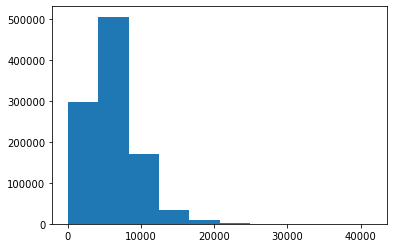

In [2]:
plt.hist(dfo.Sales)

(844392, 9)


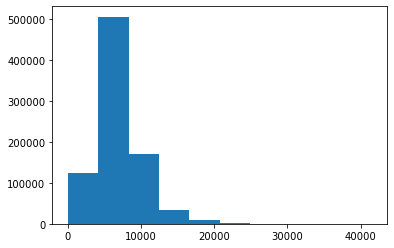

In [3]:
df = dfo[dfo.Open == 1].copy()
plt.hist(df.Sales)
print(df.shape)

(<matplotlib.legend.Legend at 0x13a38e8a0a0>, Text(0.5, 0, 'Sales'))

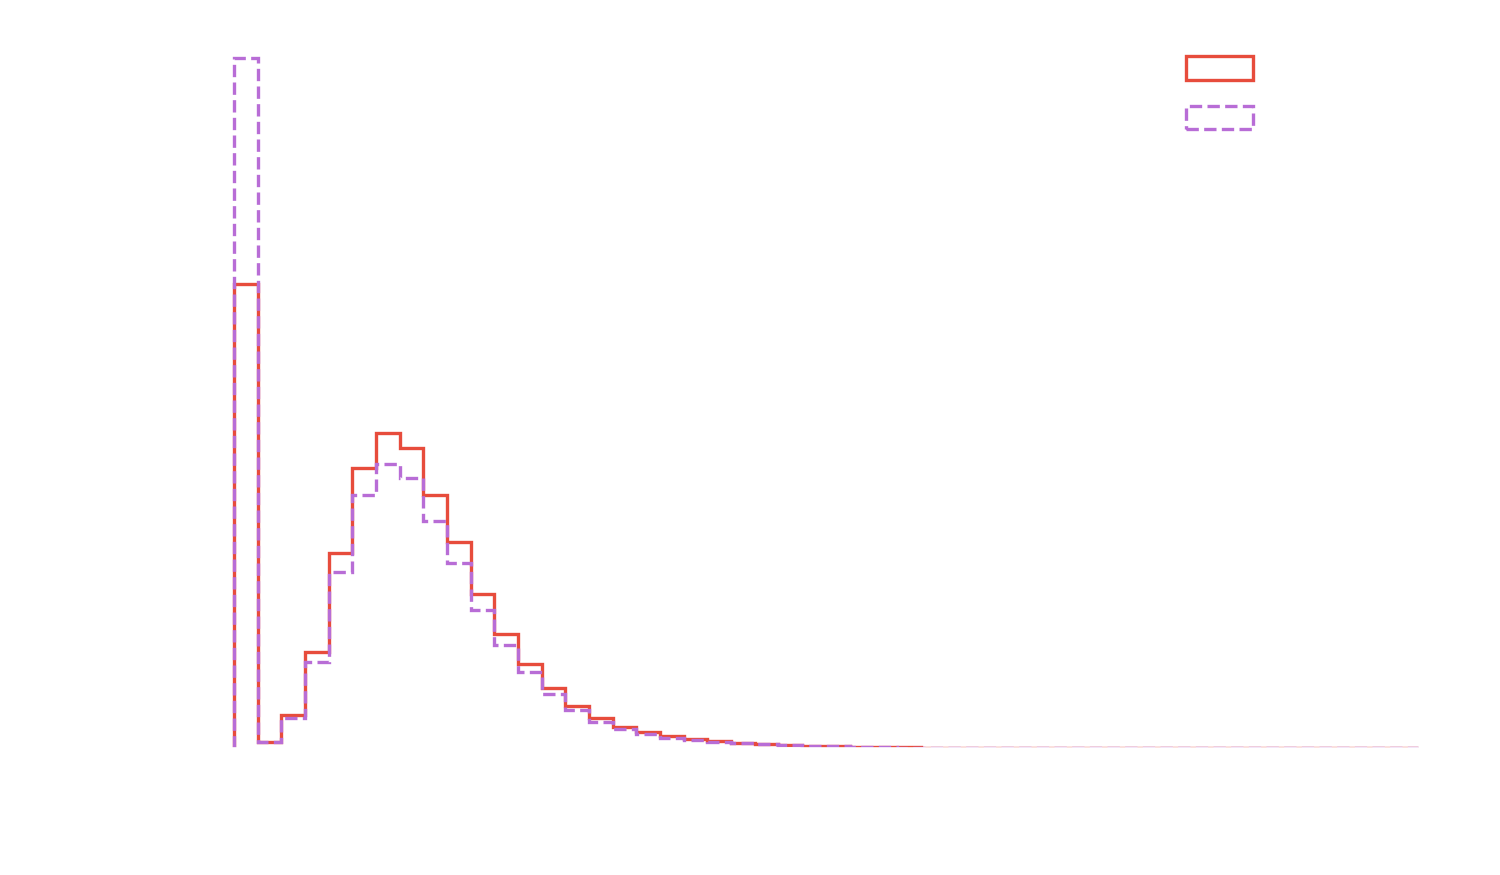

In [15]:
mask = np.random.choice(10, size=df.shape[0]) == 0
df['NewSales'] = df.Sales.copy()
df.loc[mask, 'NewSales'] = np.nan

plt.hist(df.Sales, label='Original', histtype='step')
plt.hist(df.NewSales.fillna(0), label='Corrupted', histtype='step')
plt.legend(), plt.xlabel('Sales')

(array([5.60000e+01, 9.90000e+01, 5.69000e+02, 1.69900e+03, 3.73000e+03,
        7.53800e+03, 1.27350e+04, 1.94730e+04, 2.83590e+04, 3.71620e+04,
        4.43170e+04, 4.96590e+04, 5.25790e+04, 5.32370e+04, 5.21300e+04,
        4.86090e+04, 1.29304e+05, 4.04800e+04, 3.71080e+04, 3.22020e+04,
        2.78410e+04, 2.37890e+04, 2.08400e+04, 1.76390e+04, 1.52430e+04,
        1.29900e+04, 1.09400e+04, 9.17700e+03, 7.74700e+03, 6.45100e+03,
        5.46000e+03, 4.55100e+03, 3.89900e+03, 3.37700e+03, 2.90400e+03,
        2.51200e+03, 2.16400e+03, 1.85000e+03, 1.66000e+03, 1.50600e+03,
        1.28800e+03, 1.09000e+03, 1.00500e+03, 9.40000e+02, 8.13000e+02,
        7.24000e+02, 6.71000e+02, 5.36000e+02, 4.85000e+02, 4.45000e+02,
        3.71000e+02, 3.21000e+02, 3.06000e+02, 2.26000e+02, 2.35000e+02,
        1.82000e+02, 1.65000e+02, 1.27000e+02, 8.90000e+01, 1.03000e+02,
        8.10000e+01, 5.80000e+01, 6.70000e+01, 5.50000e+01, 6.90000e+01,
        4.20000e+01, 3.80000e+01, 4.50000e+01, 2.50

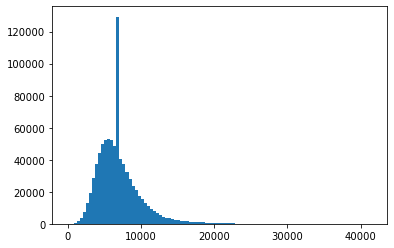

In [5]:
test_fix = df.NewSales.transform(lambda x: x.fillna(x.mean()))
plt.hist(test_fix, bins=100)

In [6]:
dfg = df.groupby(['Store', 'DayOfWeek'])
dfg.median().head(3)

Sales  Customers  Open  Promo  SchoolHoliday  NewSales
Store DayOfWeek                                                         
1     1          5302.5      581.0   1.0    1.0            0.0    5359.0
      2          4640.5      549.5   1.0    1.0            0.0    4633.0
      3          4549.5      533.0   1.0    1.0            0.0    4560.0

(<matplotlib.legend.Legend at 0x17681e5abe0>, Text(0.5, 0, 'Sales'))

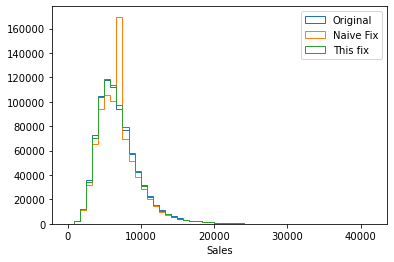

In [7]:
test_fix2 = dfg.NewSales.transform(lambda x: x.fillna(x.mean()))

opts = {'histtype': 'step', 'bins': 50}
plt.hist(df.Sales, label='Original', **opts)
plt.hist(test_fix, label='Naive Fix', **opts)
plt.hist(test_fix2, label='This fix', **opts)
plt.legend(), plt.xlabel('Sales')

In [12]:
test_fix2

0           4681.009615
1           6064.000000
2           8314.000000
3          13995.000000
4           4822.000000
               ...     
1016776     3375.000000
1016827    10765.000000
1016863    10291.324786
1017042     4491.000000
1017190     5961.000000
Name: NewSales, Length: 844392, dtype: float64

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('train.csv', low_memory=False, parse_dates=['Date'])
df.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   
2      3          5 2015-07-31   8314        821     1      1            0   
3      4          5 2015-07-31  13995       1498     1      1            0   
4      5          5 2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [4]:
df.groupby('Store').mean().head()

DayOfWeek        Sales    Customers      Open     Promo  SchoolHoliday
Store                                                                        
1       3.997877  3945.704883   467.646497  0.829087  0.382166       0.204883
2       3.997877  4122.991507   486.045648  0.832272  0.382166       0.177282
3       3.997877  5741.253715   620.286624  0.826964  0.382166       0.180467
4       3.997877  8021.769639  1100.057325  0.832272  0.382166       0.183652
5       3.997877  3867.110403   444.360934  0.826964  0.382166       0.182590

In [5]:
df.groupby(['Store', 'DayOfWeek']).agg({'Sales': 'mean', 'Customers': 'count'})

Sales  Customers
Store DayOfWeek                        
1     1          4946.119403        134
      2          4650.918519        135
      3          4454.474074        135
      4          4094.607407        135
      5          4516.414815        135
...                      ...        ...
1115  3          5666.155556        135
      4          5396.607407        135
      5          6208.881481        135
      6          6773.388060        134
      7             0.000000        134

[7805 rows x 2 columns]

In [6]:
df.groupby(['Store', 'DayOfWeek']).agg({'Sales': ['mean','max','min'], 'Customers': 'count'})

Sales              Customers
                        mean    max   min     count
Store DayOfWeek                                    
1     1          4946.119403   9528     0       134
      2          4650.918519   7959     0       135
      3          4454.474074   7821     0       135
      4          4094.607407   7785     0       135
      5          4516.414815   8414     0       135
...                      ...    ...   ...       ...
1115  3          5666.155556  10547     0       135
      4          5396.607407  11033     0       135
      5          6208.881481  11673     0       135
      6          6773.388060  10898  4497       134
      7             0.000000      0     0       134

[7805 rows x 4 columns]

In [7]:
df2 = df.groupby(['Store', 'DayOfWeek']).agg({'Sales': ['mean','max','min'], 'Customers': 'count'})
df2.head()

Sales           Customers
                        mean   max min     count
Store DayOfWeek                                 
1     1          4946.119403  9528   0       134
      2          4650.918519  7959   0       135
      3          4454.474074  7821   0       135
      4          4094.607407  7785   0       135
      5          4516.414815  8414   0       135

In [9]:
df2.columns = ['SalesMean','SalesMax','SalesMin','Count']
df2.head()

SalesMean  SalesMax  SalesMin  Count
Store DayOfWeek                                        
1     1          4946.119403      9528         0    134
      2          4650.918519      7959         0    135
      3          4454.474074      7821         0    135
      4          4094.607407      7785         0    135
      5          4516.414815      8414         0    135

In [11]:
mc_uncert = lambda x: np.std(x) / np.sqrt(x.size)
df2 = df.groupby(['Store', 'DayOfWeek']).agg(
    {'Sales': [('SalesMean','mean'), ('SalesUncert',mc_uncert)], 'Customers': 'count'})
df2

Sales             Customers
                   SalesMean SalesUncert     count
Store DayOfWeek                                   
1     1          4946.119403  139.120367       134
      2          4650.918519   94.412423       135
      3          4454.474074   97.225056       135
      4          4094.607407  129.367657       135
      5          4516.414815  113.495466       135
...                      ...         ...       ...
1115  3          5666.155556  149.328727       135
      4          5396.607407  185.628174       135
      5          6208.881481  177.362439       135
      6          6773.388060  105.882850       134
      7             0.000000    0.000000       134

[7805 rows x 3 columns]

In [ ]:
def mc_uncert2(x):
    return np.std(x) / np.sqrt(x.size)

dfg = df.groupby(['Store', 'DayOfWeek'])
dfg.agg(
    SalesMean=('Sales','mean'),
    SalesUncert=('Sales', mc_uncert2)
).reset_index().head()